<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPITULO 2 - HANDS ON MACHINE LEARNING
## TRAINING MODELS
En este archivo se encuentran los ejemplos propuestos en el capitulo y algunas anotaciones tomadas del mismo.

Vamos a mirar como funciona una regresion lineal pero con mas detalle que en el capitulo 1. En ese capitulo vimos la implementacion de sklearn que permite resolver este problema, ahora vamos a ver como se puede pensar esta implementacion.

Un modelo lineal lo podemos escribir como:
## $\hat y$ = $\theta_0$ + $\theta_1$$x_ 1$ + $\theta_2$$x_ 2$ + ... + $\theta_n$$x_ n$

Donde $\hat y$ es el valor predicho por el modelo, $\theta_i$ el parametro $i$ y $x_i$ la variable $i$. En total tenemos $n$ parametros y  $n-1$ variables (independientes). 
Lo que necesitamos además es definir una metrica que mida cuan bueno es el modelo. Una vez que contamos con una medida que nos dice cuan bueno o malo es el ajuste podemos tratar de ajustar los parametros de este para mejorar dicha metrica, o sea, optimizar el modelo.
Es comun utilizar el error cuadratico medio (MSE por sus siglas en ingles) para optimizar el modelo y encontrar los parametros de este. El MSE se define como:

## MSE(**X**,$h_\theta$) = $\frac{1}{m}$ $\sum_{i=1}^{m} (\theta^t\mathbf{x}^i - y^i)^2$

Donde el resultado del modelo para el valor $i$-ésimo esta dado por $\theta^t\mathbf{x}^i = \hat{y}^i$ mientras que $y^i$ representa el valor experimental conocido.
En definitva lo que nosotros queremos hacer es minimizar el error cuadratico medio para un dado conjunto de mediciones ajustando los parametros $\theta$ del modelo. Existe una formula matematica cerrada para resolver este problema conocida como la ecuacion normal. El libro muestra la forma de esta ecuacion y un ejemplo de su implementacion, sin embargo yo voy a obviar esta parte y pasar directamente a la implementacion de la misma usando Sklearn.

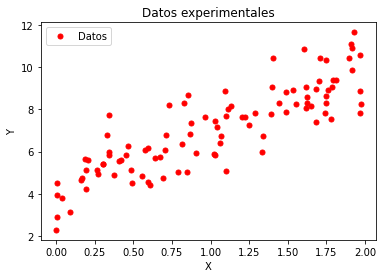

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X,y,"r.",markersize=10,label="Datos")
plt.title("Datos experimentales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

Vamos a utilizar LinearRegression de sklearn para tratar de ajustar estos datos.

Ordenada =  [4.1729449] ,  Pendiente [[2.8291645]]


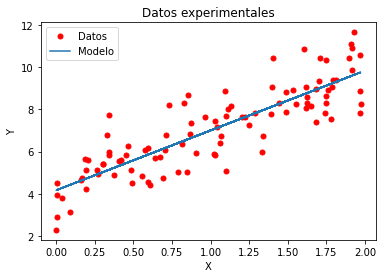

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Ordenada = ',lin_reg.intercept_,",  Pendiente" ,lin_reg.coef_)
y_pred = lin_reg.predict(X)

plt.plot(X,y,"r.",markersize=10,label="Datos")
plt.plot(X,y_pred, label="Modelo")
plt.title("Datos experimentales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

Como vemos, la implementacion es extremadamente sencilla. 
Vamos a estudiar con mas detalle un metodo utilizado para la optimizacion de parametros utilizado para, por ejemplo, resolver la optimizacion del MSE para un modelo linea como el que mostramos recientemente.

## DESCENSO DEL GRADIENTE

El metodo del descenso del gradiente sirve para encontrar los valores minimos de una superficie de $N$ dimensiones. En particular esta superficie puede representar el valor de una funcion de costo (como el MSE descripto anteriormente) con variables $\theta_{1,2..N}$. La idea basica del metodo es bien sencilla y queda explicita en el propio nombre. Lo que hacemos es pararnos en un punto de la funcion, calcular el gradiente y movernos en la direccion donde la componente del mismo sea minima (o maxima). Al elegir la direccion nos movemos un paso. La longitud de este paso es un parametro del algoritmo y usualmente se lo conoce como "learning rate". Al llegar al nuevo punto repetimos el proceso, calculamos el gradiente, elegimos la direccion y avanzamos. Este proceso en principio (salvo que tengamos la suerte de caer en el minimo exacto) puede ser infinito, por lo cual debemos definir una tolerancia de corte para finalizar la busqueda.

## Batch Gradient Descent
Tal como mencionamos previamente, necesitamos calcular el gradiente de la funcion de costo sobre los parametros $\theta_j$. O sea, calcular las derivadas parciales que tienen la forma para la funcion de costo MSE.

## $\dfrac{\partial}{\partial \theta_j}MSE(\theta)$ = $\dfrac{2}{m}\sum_{i=1}^{m}(\theta^t \mathbf{x}^i - y^i)x_{j}^i$

Para poder calcular el gradiente debemos calcular las $N$ derivadas parciales y evaluarlas en el punto donde estemos parados. Lo que debemos notar es que cada una de estas derivadas necesita el conjunto completo de datos (los $M$ datos de las $N$ variables), con lo cual se vuelve evidente que para conjuntos de datos muy grandes el algoritmo es muy lento. 

(100, 2)


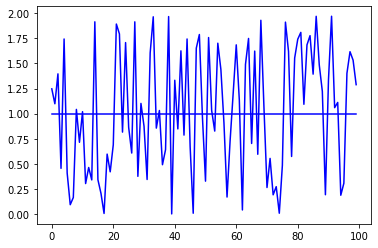

In [7]:
X_b = np.c_[np.ones((100, 1)), X]
plt.plot(X_b,'b-')
print(X_b.shape)